# **Python for data science and data analysis from scratch**




# **Visualización de datos**


Librerías que utilizaremos hoy:




## **Pandas**
Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.

---

---

## **Seaborn**
Librería para crear visualizaciones y gráficas estáticas, animadas e interactivas.

---

---


In [0]:
import seaborn as sns

import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---

---

La visualización de datos es una representación gráfica de la información. 

Mediante el uso de elementos visuales, como gráficos y mapas, la visualización de datos ofrece una manera accesible para detectar y comprender las tendencias, los valores atípicos y los patrones en los datos.


![Titanic](https://canalhistoria.es/wp-content/uploads/2016/05/1.Portada.jpg)

Para esta sesión usaremos un dataset que contiene información general de los pasajeros del Titanic (género, edad, tipo de boleto, etc), con estos datos podemos empezar a formularnos preguntas que vamos a responder más adelante.

---

---


Primer paso, leer los datos:

In [0]:
# ventajas de usar librerias
import codecs
from contextlib import closing
import csv
import requests

url = 'https://titanic-data-set.s3.amazonaws.com/test.csv'

stream = requests.get(url, stream=True)
with closing(stream) as r:
    lines = r.iter_lines()
    decoded = codecs.iterdecode(lines, 'utf-8')
    reader = csv.reader(decoded)
    for row in reader:
        print(row)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['892', '3', 'Kelly, Mr. James', 'male', '34.5', '0', '0', '330911', '7.8292', '', 'Q']
['893', '3', 'Wilkes, Mrs. James (Ellen Needs)', 'female', '47', '1', '0', '363272', '7', '', 'S']
['894', '2', 'Myles, Mr. Thomas Francis', 'male', '62', '0', '0', '240276', '9.6875', '', 'Q']
['895', '3', 'Wirz, Mr. Albert', 'male', '27', '0', '0', '315154', '8.6625', '', 'S']
['896', '3', 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)', 'female', '22', '1', '1', '3101298', '12.2875', '', 'S']
['897', '3', 'Svensson, Mr. Johan Cervin', 'male', '14', '0', '0', '7538', '9.225', '', 'S']
['898', '3', 'Connolly, Miss. Kate', 'female', '30', '0', '0', '330972', '7.6292', '', 'Q']
['899', '2', 'Caldwell, Mr. Albert Francis', 'male', '26', '1', '1', '248738', '29', '', 'S']
['900', '3', 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)', 'female', '18', '0', '0', '2657', '7.2292', '', 'C']
['901', '3', 'Davie

In [0]:
titanic_training = pd.read_csv("https://titanic-data-set.s3.amazonaws.com/train.csv")

titanic_training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_test = pd.read_csv("https://titanic-data-set.s3.amazonaws.com/test.csv")

titanic_data = pd.concat([titanic_training, titanic_test], axis=0, ignore_index=True, sort=True)

titanic_data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736



# **Limpieza de los datos**

Qué es la limpieza de datos y porqué debe importarnos?

Los datos pueden presentar problemas. Estos problemas pueden ocurrir durante la recolección, el almacenamiento o el envío. 

Estos problemas pueden efectar nuestro análisis, entonces debemos considerar los detalles que pudieran existir, antes de empezar a generar nuestras conclusiones.

En resumen:

    Tenemos que tener en cuenta los problemas de nuestros datos.
    Y comprender cómo pueden afectar nuestro análisis.

**Algunos problemas comunes**

Muchas cosas pueden salir mal al recopilar datos y su efecto debe determinarse en cada análisis. 

No existe una fórmula o herramienta mágica que haga el trabajo por nosotros. 
Sin embargo, podemos tener algunas ideas de problemas comunes con los datos:

    Los registros pueden tener atributos faltantes.
    Los registros pueden tener valores y atributos duplicados.
    Los registros pueden tener más o menos valores que otros registros.
    Los nombres de los atributos pueden ser engañosos.
    Los valores de los atributos pueden tener un rango extremadamente amplio.
    Los valores de los atributos en realidad pueden ser una combinación de atributos.
    Los valores para las fechas pueden tener diferentes formatos.
    Los atributos numéricos pueden tener un valor de texto fuera de lugar, o viceversa.





In [0]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [0]:
titanic_data.tail(10)
# valores Na?

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1299,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1300,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,1301,3,female,1,NaN,SOTON/O.Q. 3101315
1301,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [0]:
# NA Not available
titanic_data.tail().isna()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,True,True,False,False,False,False,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,True,True,False,False,False,False,False,False,False,False,True,False
1308,True,True,False,False,False,False,False,False,False,False,True,False


**Encadenamiento de métodos en python**

El encadenamiento de métodos es un estilo de programación que invoca múltiples llamadas secuenciales, cada llamada realiza una acción en el mismo objeto y lo regresa ya modificado. 

Elimina la necesidad de crear variables en cada paso.

In [0]:
name = '    SAturDays*AI      '

# pasos:
# 1. quitar mayusculas
# 2. reemplazar el * por .
# 3. quitar los espacios en blanco al inicio y al final

print(
    name.lower()
        .replace('*','.')
        .strip()
)

saturdays.ai


In [0]:
titanic_data.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
# filtrar los datos donde Cabin si tenga valores validos

rows_with_cabin = titanic_data['Cabin'].isna() == False

titanic_data[rows_with_cabin].head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
10,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783


In [0]:
titanic_data['Name'].duplicated().sum()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
1125,39.0,C85,C,71.2833,"Cumings, Mr. John Bradley",0,1126,1,male,1,NaN,PC 17599


In [0]:
titanic_data[titanic_data['Cabin'].duplicated()]


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [0]:
titanic_data[titanic_data['Name'] != 'Kelly, Mr. James']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


**Ejercicios**

1. Mostrar el número de personas con género Femenino

In [0]:
titanic_data[titanic_data['Sex'] == 'female'].count()['Sex']

466

2. Mostrar si más de una persona viajaba en la misma cabina

In [0]:
titanic_data['Cabin'].dropna().duplicated().sum() 

109

**Visualizaciones**

Para éstas visualizaciones usaremos el método [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) de la librería seaborn.

Ver la distribución de pasajeros por género:

In [0]:
# validar que no tenemos valores NA en Gender

titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

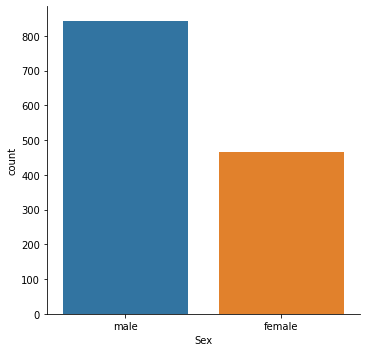

In [0]:
sns.catplot('Sex', data=titanic_data, kind='count')

Ver la distribución de pasajeros por clase (clase 3 es la clase turista):

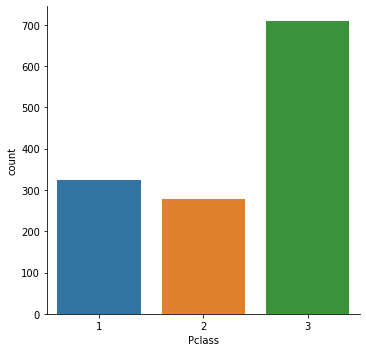

In [0]:
sns.catplot('Pclass', data=titanic_data, kind='count')

Ver la distribución de pasajeros por clase y género:

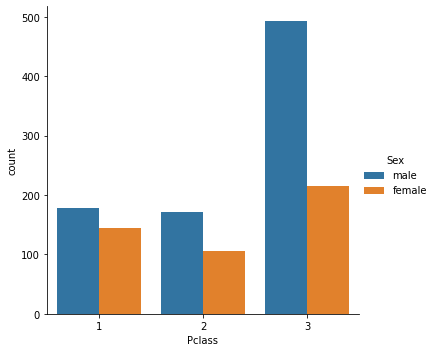

In [0]:
sns.catplot('Pclass', data=titanic_data, hue='Sex', kind='count')

Podemos crear definiciones para asignarlas a nuestros datos, como ejemplo vamos a crear la categoría de niño para los menores de 16 años y vamos a asignar estos resultados a una nueva columna llamada 'person':


In [0]:
def titanic_children(passenger):
    
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_data['person'] = titanic_data[['Age','Sex']].apply(titanic_children, axis=1)
titanic_data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,person
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,male
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,female
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,female
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,female
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,male
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,male
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,male
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,child
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,female
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,child


**Ejercicios**
1. Mostrar la distribución de pasajeros, mostrando si son hombres, mujeres o niños.

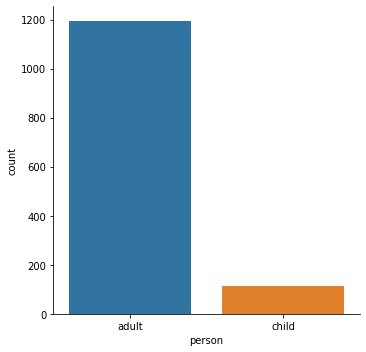

In [0]:
# usar la columna person
sns.catplot('person', data=titanic_data, kind='count')

2. Mostrar la distribución de pasajeros, mostrando si son hombres, mujeres o niños para cada clase.

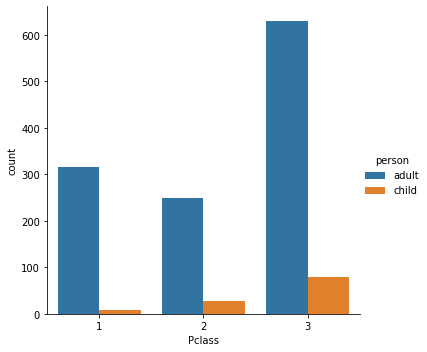

In [0]:
sns.catplot('Pclass', data=titanic_data, kind='count', hue='person')

**Remplazar valores NA**

Si decidimos que los valores NA van a ser problematicos en una variable en específico, podemos lidiar con esto de diferentes maneras, por ejemplo podemos eliminar los registros, o llenar los valores faltantes, usando la media o la mediana.


In [0]:
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()
print(mean_age, median_age)

29.881137667304014 28.0


**Cuál debemos usar para remplazar los valores NA?**

Podemos usar una Gráfica de distribución para ayudarnos a visualizar la frecuencia y el rango entero de los valores y poder analizar nuestras opciones.

Para esto vamos a hacer la gráfica sin incluir los valores NA de la dimensión de Age.


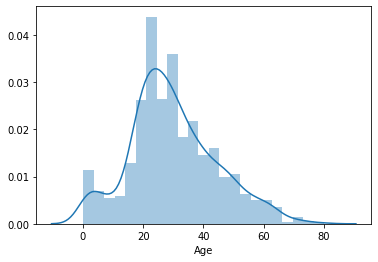

In [0]:
sns.distplot(titanic_data['Age'].dropna())

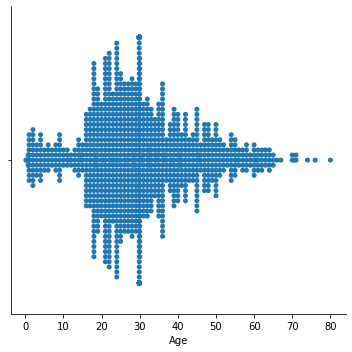

In [0]:
 titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)
 sns.catplot('Age', data=titanic_data, kind='swarm')

**Borrar registros con valores NA**

La columna de Survived también tiene valores NA.
Podemos usar el método value_counts para contar los valores en cada categoría.


In [0]:
titanic_data['Survived'].value_counts(dropna=False)

0.0    549
NaN    418
1.0    342
Name: Survived, dtype: int64

Con qué valor deberíamos remplazar los faltantes? Media o Mediana?

Hay ocasiones en las que ninguno de estos valores tiene sentido, así que vamos a ignorar los registros que presenten valores NA en la columna de Survived. Para esto usaremos el método **dropna()**.

**Importante**, filtrar que solo se eliminarán los registros que presenten valores NA en la columna de Survived.


In [0]:
# numero de registros antes de eliminar valores NA
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
 12  person       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [0]:
titanic_clean = titanic_data.dropna(subset=['Survived'])
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     889 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB


También podemos sumar columnas y crear una nueva:


In [0]:
titanic_clean['Alone'] = titanic_clean.Parch + titanic_clean.SibSp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Con el método **loc** accedemos a una columna específica y podemos agregar condiciones:

In [0]:
titanic_clean['Alone'].loc[titanic_clean['Alone'] > 0] = 'With Family'

titanic_clean['Alone'].loc[titanic_clean['Alone'] == 0] = 'Without Family'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separa

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


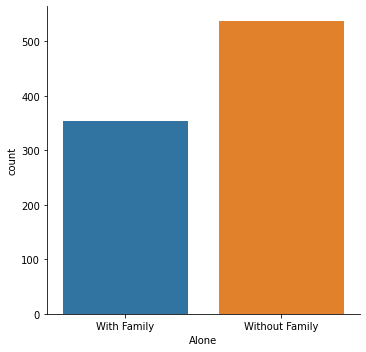

In [0]:

sns.factorplot('Alone',kind='count',data=titanic_clean)

**Ejercicios**

1. Crear una gráfica con la cantidad de sobrevivientes por género

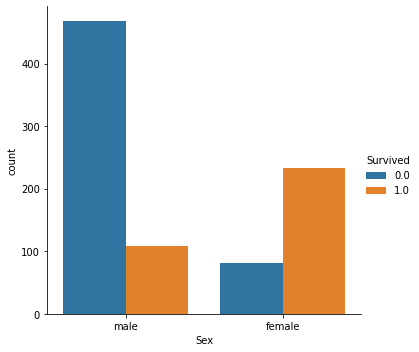

In [0]:
sns.catplot('Sex', data=titanic_data, kind='count', hue='Survived')

2. Crear una gráfica con la cantidad de sobrevivientes por clase

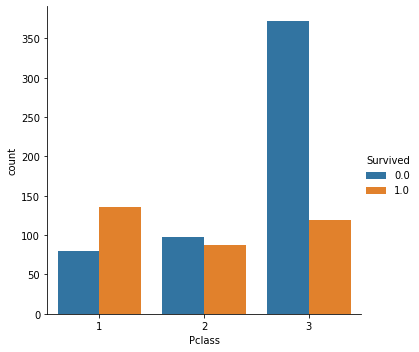

In [0]:
sns.catplot('Pclass', data=titanic_data, kind='count', hue='Survived')

Tenemos diferentes tipos de gráficas, 

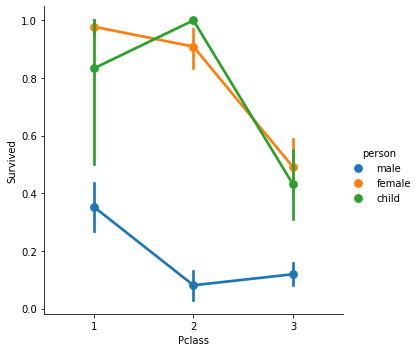

In [0]:


sns.catplot('Pclass','Survived',data=titanic_clean,hue='person', kind='point')



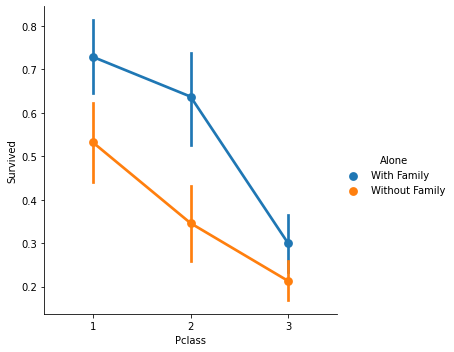

In [0]:

sns.catplot('Pclass', 'Survived', data=titanic_clean, hue='Alone', kind='point')



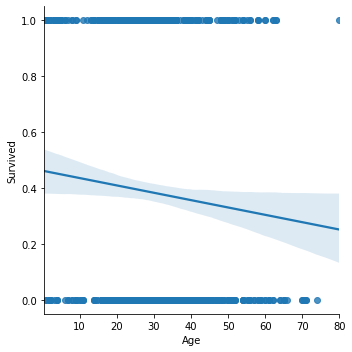

In [0]:


sns.lmplot('Age','Survived',data=titanic_clean)



**Ejercicio**

Usar las gráficas que hemos construido o crear nuevas gráficas para responder a las siguientes preguntas:


1. Cuál es el porcentaje de personas que sobrevivieron y murieron? Qué porcentaje es mayor?

2. Qué género tuvo mayor número de sobrevivientes?

3. Sobrevivieron más niños o adultos?

4. Qué edad parece tener el mayor número de muertes?

5. Qué clase tuvo más y menos muertes según la edad?



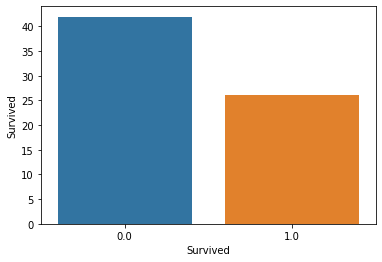

In [0]:
# 1 Cuál es el porcentaje de personas que sobrevivieron y murieron? Qué porcentaje es mayor?

sns.barplot(x='Survived', y='Survived', data=titanic_data, estimator=lambda x: len(x) / len(titanic_data) * 100)



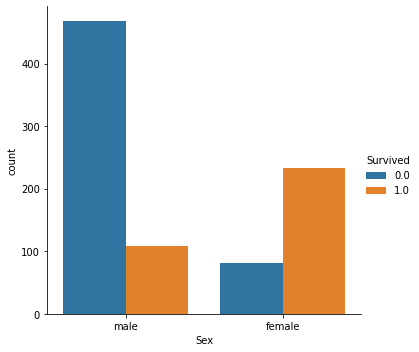

In [0]:
# 2. Qué género tuvo mayor número de sobrevivientes?
sns.catplot('Sex', data=titanic_data, kind='count', hue='Survived')

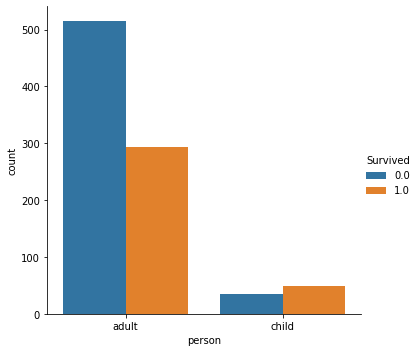

In [0]:
# 3. Sobrevivieron más niños o adultos?
def titanic_children(passenger):
    
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return 'adult'

titanic_data['person'] = titanic_data[['Age','Sex']].apply(titanic_children, axis=1)
sns.catplot('person', data=titanic_data, kind='count', hue='Survived')

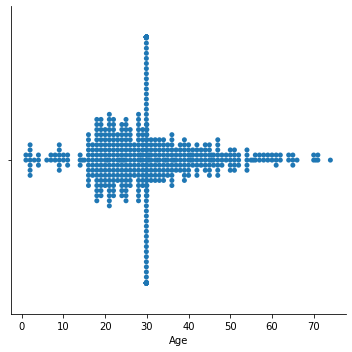

In [0]:
 
# 4. Qué edad parece tener el mayor número de muertes?
temporal = titanic_data[titanic_data['Survived'] == 0]

sns.catplot('Age', data=temporal, kind='swarm')


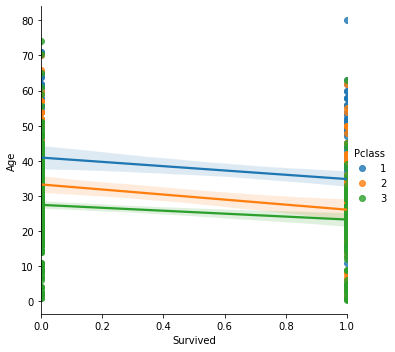

In [0]:
# 5. Qué clase tuvo más y menos muertes según la edad?
sns.lmplot(x='Survived', y='Age', data=titanic_data, hue='Pclass')